# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Features explanation

* Popularity: 0 = not popular, 100 = maximum popularity

* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Tempo: The overall estimated tempo of a track in beats per minute (BPM).

* Time signature: 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [3]:
all_tracks = pd.read_csv('all_tracks.csv',index_col=0)

In [4]:
all_tracks.head()

,artist_name,track_name,track_id,popularity,like,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Kyle Landry,Howl's Moving Castle Theme,3JTjiMAPVMfwjzPiG5R3hK,53,1,0.940,0.322,350348,0.1440,0.917,7,0.0744,-17.448,0,0.0384,142.818,3,0.0471
1,Kyle Landry,Shigatsu - Otouto Mitai Na Sonzai Piano,5tr1bCo0XRU3ZciXahlTKm,46,1,0.967,0.368,302336,0.1240,0.803,3,0.1820,-21.851,1,0.0513,138.910,4,0.1040
2,Kyle Landry,"Passion (From ""Kingdom Hearts II"") [Piano Solo]",2xFBrGSZ4mSURd8p5IU4ed,47,1,0.964,0.406,274656,0.1300,0.870,1,0.0964,-20.320,0,0.0515,116.005,4,0.0975
3,Kyle Landry,Dango Daikazoku,7c6mInVLlpnaYD55R72FDX,44,1,0.976,0.384,310974,0.0400,0.896,8,0.0943,-23.524,1,0.0357,95.854,4,0.1000
4,Kyle Landry,Interstellar - First Step,0kznmyiS92b9v1rkn9WDqV,40,1,0.961,0.232,508622,0.0651,0.930,9,0.0607,-21.866,0,0.0387,74.750,3,0.0372


In [5]:
# Change order of columns

all_tracks = all_tracks[['artist_name', 'track_name', 'track_id', 'like', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [6]:
all_tracks.describe()

,like,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,9945.000000,9945.000000,9945.000000,9945.000000,9.945000e+03,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000,9945.000000
mean,0.682755,32.424937,0.225286,0.535810,2.569605e+05,0.706409,0.240350,5.291604,0.193453,-7.656894,0.615887,0.079059,123.363494,3.893012,0.481935
std,0.465427,22.467520,0.305024,0.180306,1.200505e+05,0.242275,0.357327,3.547153,0.157934,4.967167,0.486409,0.069747,29.926952,0.446917,0.257653
min,0.000000,0.000000,0.000001,0.000000,3.500000e+03,0.000020,0.000000,0.000000,0.000000,-41.816000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,0.002850,0.403000,1.950000e+05,0.588000,0.000000,2.000000,0.094500,-8.872000,0.000000,0.038500,99.968000,4.000000,0.273000
50%,1.000000,33.000000,0.064500,0.538000,2.300270e+05,0.770000,0.000900,5.000000,0.127000,-6.170000,1.000000,0.052800,120.592000,4.000000,0.479000
75%,1.000000,48.000000,0.347000,0.678000,2.865900e+05,0.896000,0.569000,8.000000,0.260000,-4.590000,1.000000,0.089800,141.938000,4.000000,0.690000
max,1.000000,100.000000,0.996000,0.966000,2.025224e+06,0.999000,0.995000,11.000000,0.988000,-0.528000,1.000000,0.883000,220.121000,5.000000,0.984000


In [81]:
# Check if there are NaNs in the dataframe
all_tracks.isna().sum().any()

False

In [8]:
# Check that all datatypes are correct
all_tracks.dtypes

artist_name          object
track_name           object
track_id             object
like                  int64
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

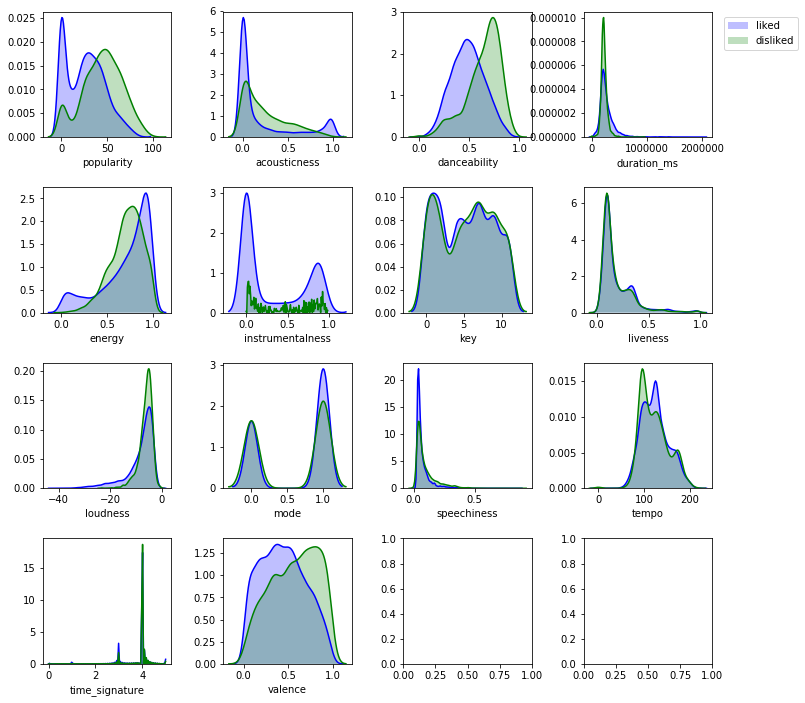

In [10]:
# Create plots for every feature distinguishing between liked and disliked songs

f, ax = plt.subplots(4,4,figsize=(12,12))

cols = [col for col in all_tracks.columns][4:]

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        if i == 14:
            break
        else:
            sns.distplot(all_tracks[all_tracks['like']==1][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='blue')
            sns.distplot(all_tracks[all_tracks['like']==0][cols[i]],hist=False,kde_kws={"shade": True},ax=col,color='green')
            i += 1

ax[0][3].legend(['liked','disliked'],bbox_to_anchor=(1.05, 1), loc=2)

In [11]:
# OBSERVATIONS

# In general terms, the songs that I liked are less popular, less danceable, and less happy than the ones that I disliked.
# Therefore, it might be that these features are more determining in the classification algorithm
# The rest of the features don't seem to be really different, on average, between liked and disliked songs.

In [ ]:
def scaling(df):
    '''Returns a dataframe with scaled features.
       Drops NaN values generated from this procedure'''
    
    columns_to_normalize = ['popularity','duration_ms','loudness','tempo','key','time_signature']
    
    for col in columns_to_normalize:
        x = df[col].values.reshape(-1,1)
        minmaxscaler = MinMaxScaler()
        x_scaled = minmaxscaler.fit_transform(x)
        df[col] = pd.DataFrame(x_scaled)
    
    return df.dropna()

In [12]:
# SCALE FEATURES THAT DON'T HAVE VALUES BETWEEN 0 AND 1

from sklearn.preprocessing import MinMaxScaler

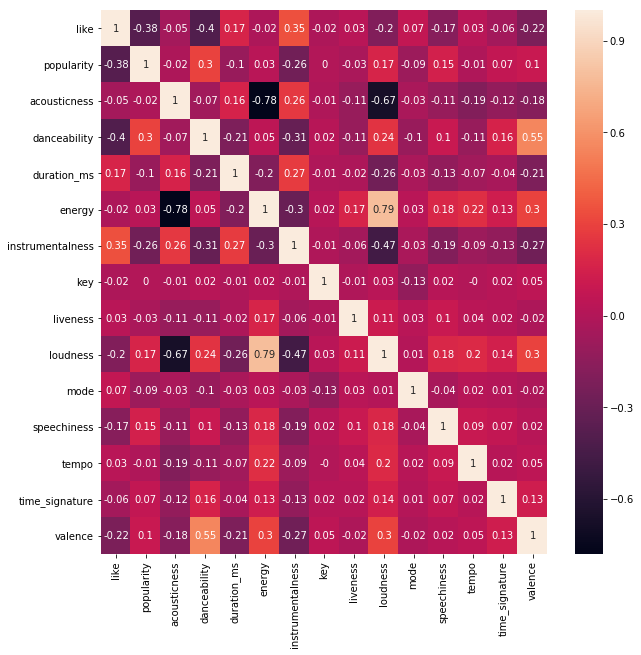

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(round(all_tracks.corr(),2),annot=True)

In [18]:
# OBSERVATIONS

# The correlation matrix confirms what is observed with the distplots: the like ratio seems presents a slightly negative
# correlation with popularity and danceabilty, and slightly positive with instrumentalness.

# As for the relationships among song features, there is a clear negative correlation between acousticness and energy
# and loudness (which are correlated with each other)
# In addition, danceability seems to be moderately correlated with valence.

# Machine learning

### Overview of classification models performance with cross-validation (with no re-sampling strategies)

In [19]:
# Import models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
X = all_tracks[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_tracks['like']

In [23]:
# NOTE: when cross_val_score is used, with integer/None inputs, if the estimator is a classifier and y is either 
# binary or multiclass, StratifiedKFold is used. Otherwise, Kfolds is used.

In [53]:
def cross_validation(X,y,n):
    '''Runs cross-validation on five classification models and prints the results (mean and standard deviation).
    
    Input:
    --------------
    X: dataframe of features
    y: target
    n: number of splits in cross-validation
    '''
    
    cv_log = cross_val_score(LogisticRegression(),X,y,cv=n)
    cv_svc = cross_val_score(SVC(),X,y,cv=n)
    cv_knn = cross_val_score(KNeighborsClassifier(),X,y,cv=n)
    cv_tree = cross_val_score(DecisionTreeClassifier(),X,y,cv=n)
    cv_forest = cross_val_score(RandomForestClassifier(),X,y,cv=n)
    
    print_cv_results()

In [54]:
def print_cv_results():
    '''Prints summary results for five classification models run with cross-validation'''
    
    print('Logistic regression --> Mean:', round(np.mean(cv_log),2), '/ Std.:', round(np.std(cv_log),2))
    print('SVC --> Mean:', round(np.mean(cv_svc),2), '/ Std.:', round(np.std(cv_svc),2))
    print('KNN --> Mean:', round(np.mean(cv_knn),2), '/ Std.:', round(np.std(cv_knn),2))
    print('Decision tree --> Mean:', round(np.mean(cv_tree),2), '/ Std.:', round(np.std(cv_tree),2))
    print('Random forest --> Mean:', round(np.mean(cv_forest),2), '/ Std.:', round(np.std(cv_forest),2))

In [55]:
cross_validation(X,y,10)

Logistic regression --> Mean: 0.79 / Std.: 0.1
SVC --> Mean: 0.81 / Std.: 0.09
KNN --> Mean: 0.8 / Std.: 0.07
Decision tree --> Mean: 0.78 / Std.: 0.05
Random forest --> Mean: 0.83 / Std.: 0.07


#### Previous results without scaling features. Scaling has significantly improved SVC, KNN and Log. Reg., but not the decision tree and random forest

- Logistic regression:  0.7152171319373528
- SVC:  0.6827553259254018
- KNN:  0.6430331739178792
- Decision tree:  0.7841013922732374
- Random forest:  0.8313569861379332

In [30]:
# Conclusions:

# With the default parameters, the Random Forest has the best performance

### IDEM with under-sampling

In [66]:
def under_sample(df):
    '''Applies under-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_1_under = df_class_1.sample(df_class_0.shape[0])
    
    df_under = pd.concat([df_class_0,df_class_1_under],axis=0)
    
    return df_under

In [67]:
all_under = under_sample(all_tracks)

In [68]:
all_under.shape

(6300, 18)

In [69]:
X = all_under[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_under['like']

In [70]:
cross_validation(X,y,10)

Logistic regression --> Mean: 0.79 / Std.: 0.1
SVC --> Mean: 0.81 / Std.: 0.09
KNN --> Mean: 0.8 / Std.: 0.07
Decision tree --> Mean: 0.78 / Std.: 0.05
Random forest --> Mean: 0.83 / Std.: 0.07


In [59]:
# The results are the same as when no re-sampling was performed

### IDEM with over-sampling

In [72]:
def over_sample(df):
    '''Applies over-sampling to a dataframe with imbalanced classes (class 0 << class 1)
    
    Input:
    --------------
    df: dataframe with imbalanced classes 
    
    Returns:
    --------------
    df: dataframe with balanced classes
    '''
    
    df_class_0 = df[df['like']==0]
    df_class_1 = df[df['like']==1]
    
    df_class_0_over = df_class_0.sample(df_class_1.shape[0],replace=True)
    
    df_over = pd.concat([df_class_0_over,df_class_1],axis=0)
    
    return df_over

In [73]:
all_over = over_sample(all_tracks)

In [74]:
all_over.shape

(13580, 18)

In [75]:
X = all_over[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_over['like']

In [76]:
cross_validation(X,y,5)

Logistic regression --> Mean: 0.79 / Std.: 0.1
SVC --> Mean: 0.81 / Std.: 0.09
KNN --> Mean: 0.8 / Std.: 0.07
Decision tree --> Mean: 0.78 / Std.: 0.05
Random forest --> Mean: 0.83 / Std.: 0.07


### Random forest without cross validation

#### Without re-sampling

In [249]:
X = all_tracks[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_tracks['like']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [251]:
rfc = RandomForestClassifier()

In [252]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
y_pred = rfc.predict(X_test)

In [254]:
accuracy_score(y_test,y_pred)

0.8631790744466801

In [255]:
confusion_matrix(y_test,y_pred)

array([[ 742,  192],
       [ 216, 1832]], dtype=int64)

In [256]:
importances=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['importances']).sort_values(by=['importances'],ascending=False)

In [257]:
importances

,importances
instrumentalness,0.189601
danceability,0.151046
acousticness,0.128813
popularity,0.094762
energy,0.081310
loudness,0.063293
speechiness,0.057944
valence,0.056131
duration_ms,0.053859
tempo,0.051320


#### With under-sampling

In [258]:
X = all_under[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_under['like']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [260]:
rfc = RandomForestClassifier()

In [261]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [262]:
y_pred = rfc.predict(X_test)

In [263]:
accuracy_score(y_test,y_pred)

0.8465608465608465

In [264]:
confusion_matrix(y_test,y_pred)

array([[847, 112],
       [178, 753]], dtype=int64)

#### With over-sampling

In [265]:
X = all_over[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_over['like']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [267]:
accuracy_score(y_test,y_pred)

0.9234167893961709

In [268]:
confusion_matrix(y_test,y_pred)

array([[1965,   83],
       [ 229, 1797]], dtype=int64)

### MODEL OPTIMIZATION

In [276]:
# CHECKING BEST PARAMETER COMBINATION FOR RANDOM FOREST CLASSIFIER

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Parameters to try
parameter_grid = {'max_features':['auto','log2',10],
                  'min_samples_split':list(range(10,101,10)),
                  'max_depth':list(range(1,11))}
                  
# Instantiate stratified cross validation
cross_validation = StratifiedKFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(rf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit model with grid_search
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8931201346517988
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10}


In [270]:
X = all_over[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

y = all_over['like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(max_depth=14,max_features=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

array([[1944,  104],
       [ 220, 1806]], dtype=int64)

In [271]:
accuracy_score(y_test,y_pred)

0.9204712812960235

In [272]:
confusion_matrix(y_test,y_pred)

array([[1944,  104],
       [ 220, 1806]], dtype=int64)

# TEST MODEL ON UNKNOWN DATA

In [277]:
import spotipy
import spotipy.util as util

In [317]:
# Authentication details
my_username = "oso41"
chosen_scope = "user-library-read playlist-modify-private"
my_client_id = ""
my_client_secret = ""

In [318]:
# Token creation
token = util.prompt_for_user_token(username=my_username,
                                   scope=chosen_scope,
                                   client_id=my_client_id,
                                   client_secret=my_client_secret,
                                   redirect_uri="http://127.0.0.1/")



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=7903c61e42d846ca8b30c16126639752&response_type=code&redirect_uri=http%3A%2F%2F127.0.0.1%2F&scope=playlist-modify-private+user-library-read in your browser


Enter the URL you were redirected to: http://127.0.0.1/?code=AQB6-lgS_99PbovuahODpjrsikfy-xKCzmY7TG2gJy8-qN41omCP8q2StbGFXNdzhieCj3C1DiN16gwXMjW6p_mDQmJkYXDMxlKTG_R-1-ASJGBd2rdmr0tx7znIXOhX5KYxvyqro1lwCYFNu_1RHYMsX6J1pTJyVlqe8CiHz98stoqqTEC_xX6f8egnnn0r0yrU9w8y17GxeOcDmpmQKmA07l-FcFChYyLtKrmLVSE94AgG3Q




In [319]:
# Spotipy object
sp = spotipy.Spotify(auth=token)

In [282]:
# Create empty lists where results will be stored
artist_name = []
track_name = []
popularity = []
track_id = []

In [283]:
# Obtain data (artist name, track name, track id, popularity) from playlist containing liked songs

playlist_id = '37i9dQZF1DWYV7OOaGhoH0'

for i in range(0,1000,100):
    results = sp.user_playlist_tracks(my_username,playlist_id=playlist_id,limit=100, offset=i)
    for i, t in enumerate(results['items']):
        artist_name.append(t['track']['artists'][0]['name'])
        track_name.append(t['track']['name'])
        track_id.append(t['track']['id'])
        popularity.append(t['track']['popularity'])

In [284]:
# Create dataframe of tracks
df_tracks = pd.DataFrame([artist_name,track_name,track_id,popularity]).transpose()
df_tracks.columns = ['artist_name','track_name','track_id','popularity']

In [286]:
df_tracks.head()

,artist_name,track_name,track_id,popularity
0,Joy Williams,Front Porch,0XIUYBQlVNG1c5vjSQKCYU,69
1,Dead Horses,Turntable,0Dp07EA5ybveKSUE27CuEd,66
2,Hozier,Movement,0SFq19lgG4qbQAZaNZ3xhO,71
3,Dermot Kennedy,A closeness,5ClDPw47BORurTM0yTwuS7,17
4,Blanco White,Olalla,4d4OJTq2Yl7TyiuGMLxa1h,73


In [287]:
# Create empty list to store songs features
rows = []

# Retrieve audio features for every track
for i in range(0,len(df_tracks['track_id']),50):
    feature_results = sp.audio_features(df_tracks['track_id'][i:i+50])
    for i, t in enumerate(feature_results):
        rows.append(t)

In [294]:
# Create dataframe from previously retrieved daa
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')

In [295]:
# Drop columns containing useless information
df_audio_features.drop(['analysis_url','track_href','type','uri'],axis=1,inplace=True)

In [296]:
# Change 'id' name to 'track_id' in order to match with previous dataframe (prepare for merging)
df_audio_features.rename(columns={'id':'track_id'},inplace=True)

In [297]:
# Merge both dataframes
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')

In [299]:
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Joy Williams,Front Porch,0XIUYBQlVNG1c5vjSQKCYU,69,0.887,0.567,231813,0.224,0.000000,1,0.1090,-10.024,1,0.0299,124.440,4,0.200
1,Dead Horses,Turntable,0Dp07EA5ybveKSUE27CuEd,66,0.811,0.603,196173,0.575,0.001830,0,0.1200,-10.325,1,0.0285,95.116,1,0.673
2,Hozier,Movement,0SFq19lgG4qbQAZaNZ3xhO,71,0.160,0.381,237800,0.502,0.000070,1,0.0842,-5.505,0,0.0368,144.300,4,0.147
3,Dermot Kennedy,A closeness,5ClDPw47BORurTM0yTwuS7,17,0.766,0.526,251173,0.458,0.000335,5,0.1090,-9.472,1,0.0384,76.972,4,0.501
4,Blanco White,Olalla,4d4OJTq2Yl7TyiuGMLxa1h,73,0.662,0.572,247373,0.409,0.296000,3,0.1250,-11.384,1,0.0377,129.983,4,0.351


In [300]:
X_unknown = df[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]

In [303]:
X_unknown_scaled = minmaxscaler.fit_transform(X_unknown)

In [307]:
X_unknown_scaled_df = pd.DataFrame(X_unknown_scaled,columns=X_unknown.columns)

In [308]:
X_unknown_scaled_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.945205,0.897678,0.512409,0.353669,0.186355,0.000000,0.090909,0.079735,0.565816,1.0,0.054856,0.446817,0.75,0.192702
1,0.904110,0.820683,0.564964,0.200401,0.629817,0.002042,0.000000,0.097069,0.548168,1.0,0.042266,0.208339,0.00,0.756737
2,0.972603,0.161161,0.240876,0.379415,0.537587,0.000078,0.090909,0.040656,0.830783,0.0,0.116906,0.608329,0.75,0.129502
3,0.232877,0.775094,0.452555,0.436925,0.481996,0.000374,0.454545,0.079735,0.598182,1.0,0.131295,0.060783,0.75,0.551634
4,1.000000,0.669733,0.519708,0.420584,0.420088,0.330357,0.272727,0.104948,0.486074,1.0,0.125000,0.491896,0.75,0.372764


In [309]:
y_pred_unk = rfc.predict(X_unknown_scaled_df)

In [310]:
y_pred_unk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [311]:
df['like'] = y_pred_unk

In [312]:
df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,like
0,Joy Williams,Front Porch,0XIUYBQlVNG1c5vjSQKCYU,69,0.887000,0.567,231813,0.2240,0.000000,1,0.1090,-10.024,1,0.0299,124.440,4,0.2000,1
1,Dead Horses,Turntable,0Dp07EA5ybveKSUE27CuEd,66,0.811000,0.603,196173,0.5750,0.001830,0,0.1200,-10.325,1,0.0285,95.116,1,0.6730,1
2,Hozier,Movement,0SFq19lgG4qbQAZaNZ3xhO,71,0.160000,0.381,237800,0.5020,0.000070,1,0.0842,-5.505,0,0.0368,144.300,4,0.1470,1
3,Dermot Kennedy,A closeness,5ClDPw47BORurTM0yTwuS7,17,0.766000,0.526,251173,0.4580,0.000335,5,0.1090,-9.472,1,0.0384,76.972,4,0.5010,1
4,Blanco White,Olalla,4d4OJTq2Yl7TyiuGMLxa1h,73,0.662000,0.572,247373,0.4090,0.296000,3,0.1250,-11.384,1,0.0377,129.983,4,0.3510,1
5,Rosie Carney,Thousand (feat. Lisa Hannigan),12VVXFEYxro5C61KyWee9C,41,0.943000,0.676,206440,0.1980,0.013200,1,0.1040,-13.910,1,0.0333,118.004,4,0.1250,1
6,William Wild,Morning,3Gsuq6GGXfKB9AwNwL87NJ,53,0.877000,0.384,262571,0.3930,0.000710,2,0.1070,-10.532,1,0.0293,141.948,4,0.2870,1
7,The Barr Brothers,You Would Have to Lose Your Mind,6mV07lqIpvpBh3xBXn1M71,58,0.173000,0.344,381640,0.4470,0.723000,6,0.1200,-8.408,0,0.0254,88.678,4,0.2420,1
8,Hollow Coves,Coastline,2KCqAdd2ad0hpJc5ySoTE8,71,0.630000,0.670,233973,0.4960,0.003160,2,0.0584,-11.230,1,0.0277,100.168,4,0.4270,1
9,S. Carey,Rose Petals,0NJ1LV5VblYyJsJt3EbAx7,68,0.888000,0.562,213667,0.2820,0.002970,10,0.0812,-11.956,1,0.0302,127.964,4,0.1720,1


In [321]:
playlist = sp.user_playlist_create(user=my_username,name='Spotipie',public=False)

In [322]:
playlist

{'collaborative': False,
 'description': None,
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4JC5d35h02hE7E68Kli3rr'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/4JC5d35h02hE7E68Kli3rr',
 'id': '4JC5d35h02hE7E68Kli3rr',
 'images': [],
 'name': 'Spotipie',
 'owner': {'display_name': 'Roger Roig Rodelas',
  'external_urls': {'spotify': 'https://open.spotify.com/user/oso41'},
  'href': 'https://api.spotify.com/v1/users/oso41',
  'id': 'oso41',
  'type': 'user',
  'uri': 'spotify:user:oso41'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MSwxNWU5YjhmNzM0NDBjMjE1MmIwMmY0ODYxOWIzYmZmMmY3NWYyMWQy',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/4JC5d35h02hE7E68Kli3rr/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:4JC5d35h02hE7E68Kli3rr'}

In [325]:
good_tracks = [f'spotify:track:{track_id}' for track_id in df[df['like']==1]['track_id']]

In [329]:
playlist['uri'].split(':')[-1]

'4JC5d35h02hE7E68Kli3rr'

In [331]:
for i in range(0,len(tracks),100):
    sp.user_playlist_add_tracks(my_username,playlist['uri'].split(':')[-1],tracks[i:i+100])

In [332]:
len(tracks)

101

In [333]:
bad_tracks = [f'spotify:track:{track_id}' for track_id in df[df['like']==0]['track_id']]

In [335]:
len(bad_tracks)

19

In [334]:
playlist_bad = sp.user_playlist_create(user=my_username,name='Spotimal',public=False)

In [336]:
for i in range(0,len(bad_tracks),100):
    sp.user_playlist_add_tracks(my_username,playlist_bad['uri'].split(':')[-1],bad_tracks[i:i+100])

In [ ]:
sp.